In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

In [2]:
# Part 1 :
#  Step 1 :Assigning avriable and preparing data
df_whale = pd.read_csv('C:/Users/mehas/Downloads/whale_returns.csv' , index_col = 'Date',parse_dates = True , infer_datetime_format =True)
df_tsx = pd.read_csv('C:/Users/mehas/Downloads/sp_tsx_history.csv', index_col = 'Date' ,parse_dates = True , infer_datetime_format =True)
df_otex = pd.read_csv('C:/Users/mehas/Downloads/otex_historical.csv', index_col = 'Date',parse_dates = True , infer_datetime_format =True)
df_l=pd.read_csv('C:/Users/mehas/Downloads/l_historical.csv', index_col = 'Date',parse_dates = True , infer_datetime_format =True)
df_algo = pd.read_csv('C:/Users/mehas/Downloads/algo_returns.csv', index_col = 'Date',parse_dates = True , infer_datetime_format =True)
df_shp = pd.read_csv('C:/Users/mehas/Downloads/shop_historical.csv', index_col = 'Date',parse_dates = True , infer_datetime_format =True)
df_whale.shape
# df_tsx.head()
# df_otex.head()
# df_historical.head()
# df_algo.head()
# df_shp.head()

(1060, 4)

In [3]:
## Step 1 (a) : Dealing with individual stock data :
# dropping un-necessary columns. 
# renaming columns.
# dropping null values.
# sorting index
# calculating daily retuens.

In [4]:
df_l.drop(columns = 'Symbol', inplace = True)

In [5]:
df_l.rename(columns ={'Close' : 'L'},inplace = True)
df_l.dropna(inplace = True)
df_l.sort_index(inplace = True)
df_l_daily = df_l.pct_change()
df_l_daily.dropna(inplace = True)
df_l_daily.head()

,L
Date,
2018-01-03,-0.010002
2018-01-04,0.000174
2018-01-05,0.000000
2018-01-08,-0.009753
2018-01-09,0.008969


In [6]:
df_shp.drop(columns = ['Symbol'],inplace = True)

In [7]:
df_shp.rename(columns ={'Close' : 'Shop'}, inplace  =True)
df_shp.dropna(inplace = True)
df_shp.sort_index(inplace = True)
df_shp_daily = df_shp.pct_change()
df_shp_daily.dropna(inplace = True)

In [8]:
df_otex.drop(columns = ['Symbol'], inplace = True)


In [9]:
df_otex.rename(columns ={'Close' : 'Otex'}, inplace = True)
df_otex.dropna(inplace = True)
df_otex.sort_index(inplace = True)
df_otex_daily = df_otex.pct_change()
df_otex_daily.dropna(inplace = True)


In [10]:
df_otex_daily.head()

,Otex
Date,
2018-01-03,-0.011703
2018-01-04,-0.003715
2018-01-05,-0.007924
2018-01-08,-0.009631
2018-01-09,-0.000712


In [11]:
# Step 1(b)  : Preparing portfolios and index data :
# Dropping null values
# understanding shape
# changing data type,where required.
# calculating daily returns where required.


In [12]:
### preparing whale data :
df_whale.isnull().mean()*100

SOROS FUND MANAGEMENT LLC      0.09434
PAULSON & CO.INC.              0.09434
TIGER GLOBAL MANAGEMENT LLC    0.09434
BERKSHIRE HATHAWAY INC         0.09434
dtype: float64

In [13]:
df_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [14]:
df_whale.dropna(inplace = True)

In [15]:
df_whale.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [16]:
### Preparing TSX data :

In [17]:
df_tsx.shape

(1818, 1)

In [18]:
df_tsx.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [19]:
df_tsx['Close'] = df_tsx['Close'].str.replace('$' , '')

C:\Users\mehas\AppData\Local\Temp/ipykernel_16872/1407714924.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_tsx['Close'] = df_tsx['Close'].str.replace('$' , '')


In [20]:
df_tsx['Close'] = df_tsx['Close'].str.replace(',' , '')

In [21]:
df_tsx.dtypes
df_tsx['Close']=df_tsx['Close'].astype('float')

In [22]:
df_tsx.dtypes

Close    float64
dtype: object

In [23]:
df_tsx.dropna(inplace = True)

In [24]:
df_tsx['TSX']=df_tsx['Close'].pct_change()
df_tsx.head()

,Close,TSX
Date,,
2012-10-01,12370.19,NaN
2012-10-02,12391.23,0.001701
2012-10-03,12359.47,-0.002563
2012-10-04,12447.68,0.007137
2012-10-05,12418.99,-0.002305


In [25]:
df_tsx_daily = df_tsx.drop(columns = 'Close')

In [26]:
df_tsx_daily.dropna(inplace = True)

In [27]:
### Preparing algo data :

In [28]:
df_algo.dropna(inplace = True)

In [29]:
df_algo.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [30]:
# Step 2 (a) : Concatenating Portfolios and Index :

In [31]:
df_daily = pd.concat([df_whale,df_algo,df_tsx_daily] , axis = 'columns' , join ='inner')
df_daily.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


In [32]:
df_daily = df_daily.rename(columns = {'BERKSHIRE HATHAWAY INC':'BRK'})

In [33]:
# Step 3 : Conducting Quantitative Analysis on Portfolioos :

<AxesSubplot:xlabel='Date'>

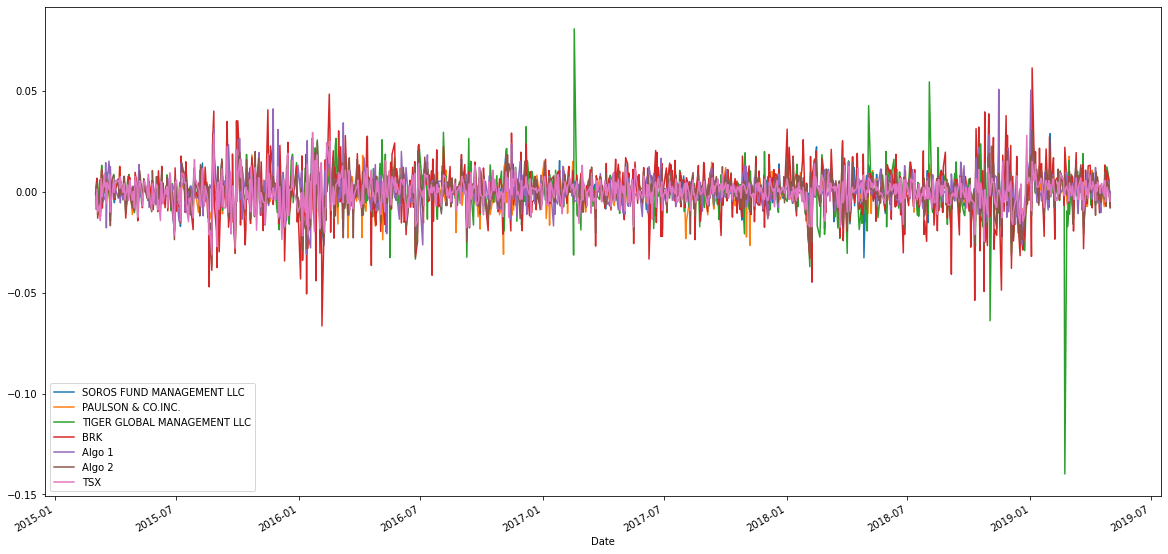

In [34]:
## step 3 (a) : Performance Analysis
### Daily returns:
df_daily.plot(figsize =(20,10))

In [35]:
## Step 3 (a) :performance Analysis:
### Calculating and plotting cumulative returns
df_cumulative = (1+df_daily).cumprod()

In [36]:
df_cumulative.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BRK,Algo 1,Algo 2,TSX
Date,,,,,,,
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.998058,0.999051,0.991470
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.989486,1.001464,0.988128
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.988541,1.005794,0.989456
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.983641,0.994267,0.979589
2015-03-09,0.997617,1.002951,0.996633,0.989534,0.978283,0.995563,0.973168


<AxesSubplot:xlabel='Date'>

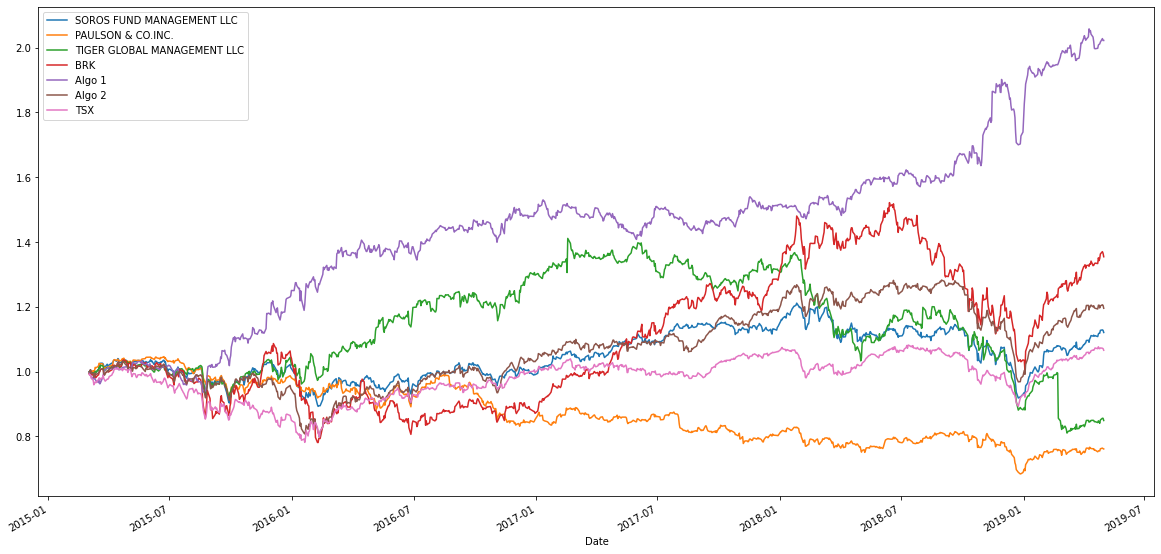

In [37]:
df_cumulative.plot(figsize=(20,10))

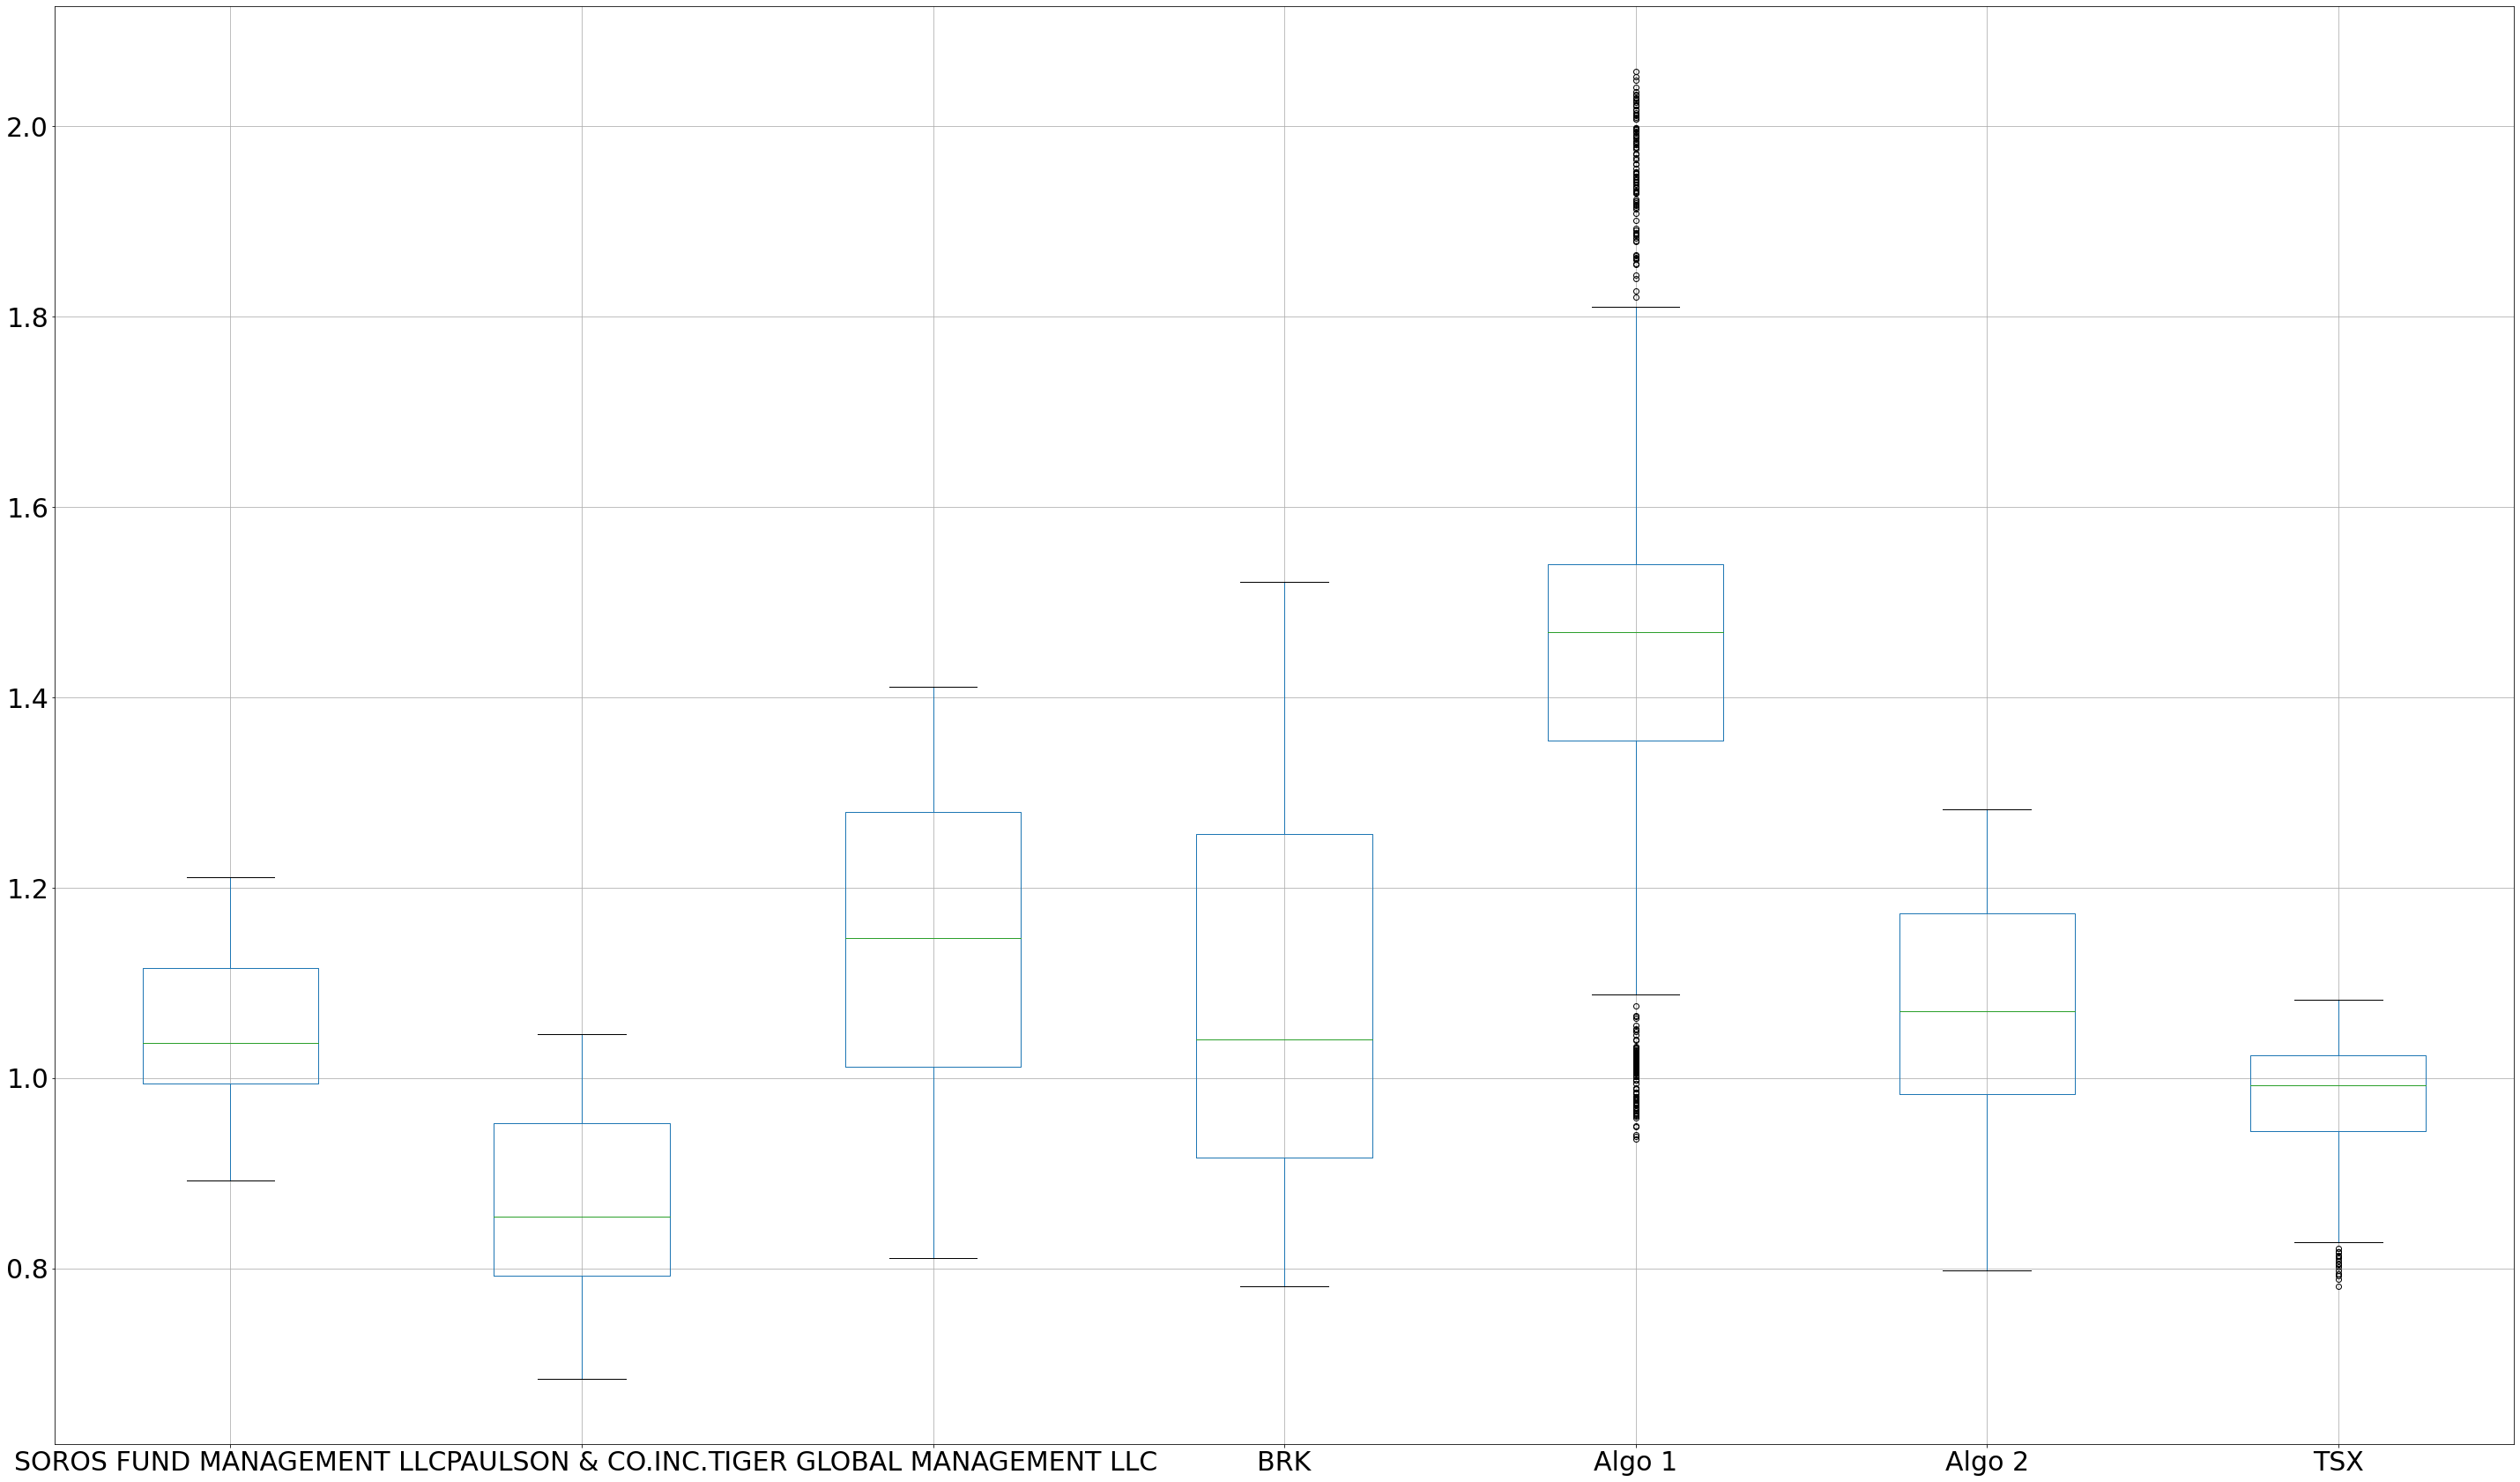

In [38]:
## Step 3 (b) : Risk Analysis :
### Box Plot :
boxplot = df_cumulative.boxplot(figsize =(50,30) ,fontsize = 30)

In [39]:
## Step 3 (b) : Risk Analysis :
### Standard Deviation :
df_std = df_daily.std()
df_std.sort_values()
# As indicated below is the series of funds in the ascending order manifesting their riskiness when compared with TSX.('BRK' is the riskiest)

PAULSON & CO.INC.              0.006982
TSX                            0.007034
Algo 1                         0.007589
SOROS FUND MANAGEMENT LLC      0.007828
Algo 2                         0.008326
TIGER GLOBAL MANAGEMENT LLC    0.010883
BRK                            0.012826
dtype: float64

In [40]:
## Step 3 (b): Risk Analysis :
### Annualized Standard Deviation :
df_annualized_std = df_std *np.sqrt(252)
df_annualized_std

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BRK                            0.203599
Algo 1                         0.120470
Algo 2                         0.132177
TSX                            0.111664
dtype: float64

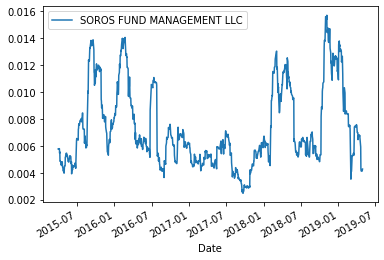

In [41]:
## Step 3 (c) Rolling Statistics :
### Rolling Standard deviation :
sfm_rolling_std = df_daily['SOROS FUND MANAGEMENT LLC'].rolling(window = 21).std().plot(legend = True)

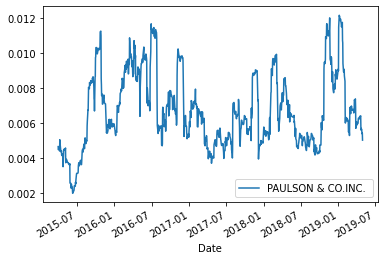

In [42]:
paulson_rolling_std = df_daily['PAULSON & CO.INC. '].rolling(window = 21).std().plot(legend = True)

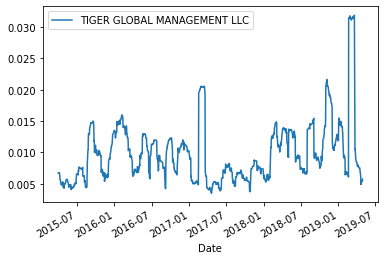

In [43]:
tgm_rolling_std = df_daily['TIGER GLOBAL MANAGEMENT LLC'].rolling(window = 21).std().plot(legend = True)

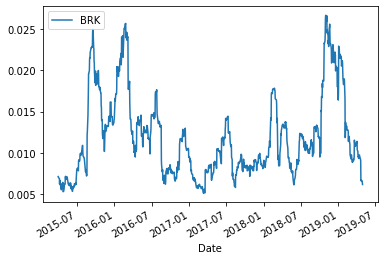

In [44]:
brk_rolling_std = df_daily['BRK'].rolling(window = 21).std().plot(legend = True)

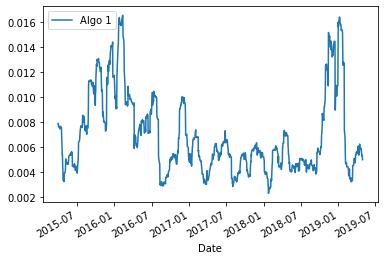

In [45]:
algo1_rolling_std = df_daily['Algo 1'].rolling(window = 21).std().plot(legend = True)

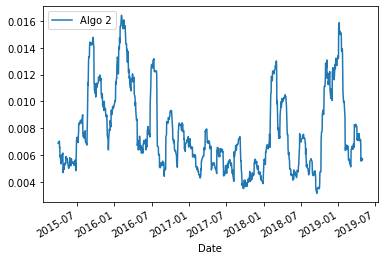

In [46]:
algo2_rolling_std = df_daily['Algo 2'].rolling(window = 21).std().plot(legend = True)

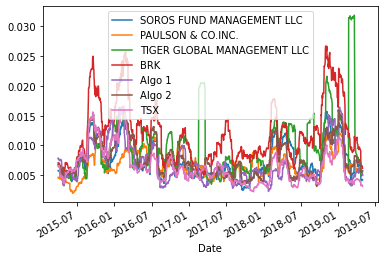

In [47]:
df_daily_rolling = df_daily.rolling(window =21).std().plot(legend = True)

In [48]:
## Step 3(c):Rolling Statistics :
### Correlation of portfolios with TSX:
import seaborn as sns

In [49]:
# calculating correlations :
correlation_port = df_daily.corr()
correlation_port

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BRK,Algo 1,Algo 2,TSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BRK,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
TSX,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


<AxesSubplot:>

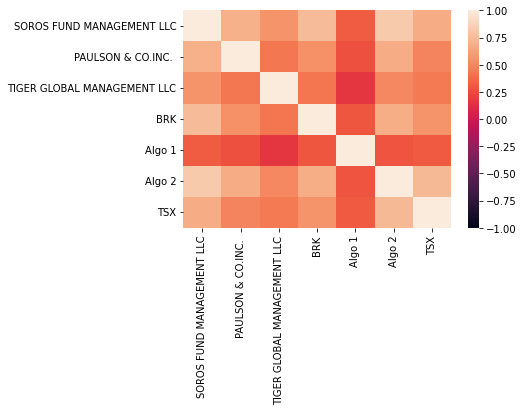

In [50]:
sns.heatmap(correlation_port,vmin = -1 , vmax= 1)

Answer: According to this data , the algo 2 shows the strongest correlation with TSX among the aforementioned portfolios.

In [51]:
## Step 3 (c) : Rolling Statistics :
### Correlation of stocks with TSX :


In [52]:
stocks_returns = pd.concat([df_l_daily,df_otex_daily,df_shp_daily,df_tsx_daily],axis = 'columns',join = 'inner')
stocks_returns.head()

,L,Otex,Shop,TSX
Date,,,,
2018-01-03,-0.010002,-0.011703,0.023398,0.003774
2018-01-04,0.000174,-0.003715,0.017092,0.002528
2018-01-05,0.000000,-0.007924,-0.001455,-0.003869
2018-01-08,-0.009753,-0.009631,0.016392,-0.001944
2018-01-09,0.008969,-0.000712,-0.011254,0.000097


In [53]:
# stocks_returns.iloc[-1]

In [54]:
stocks_correlation = stocks_returns.corr() 
stocks_correlation

,L,Otex,Shop,TSX
L,1.000000,0.181266,0.127501,0.315998
Otex,0.181266,1.000000,0.398427,0.459358
Shop,0.127501,0.398427,1.000000,0.417669
TSX,0.315998,0.459358,0.417669,1.000000


<AxesSubplot:>

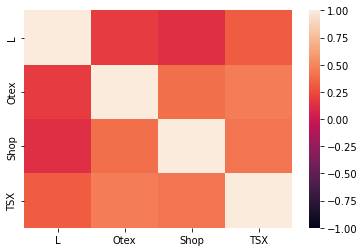

In [55]:
sns.heatmap(stocks_correlation ,vmin = -1, vmax = 1)

Answer :Among the stocks given the data shows that otex is more correlated with TSX than any other given stock.

In [57]:
## Step 3(c): Rolling Statistics :
### Rolling Beta of Algo 2 :

In [58]:
df_cov = df_daily['Algo 2'].rolling(window = 60).cov(df_daily['TSX'])

<AxesSubplot:xlabel='Date'>

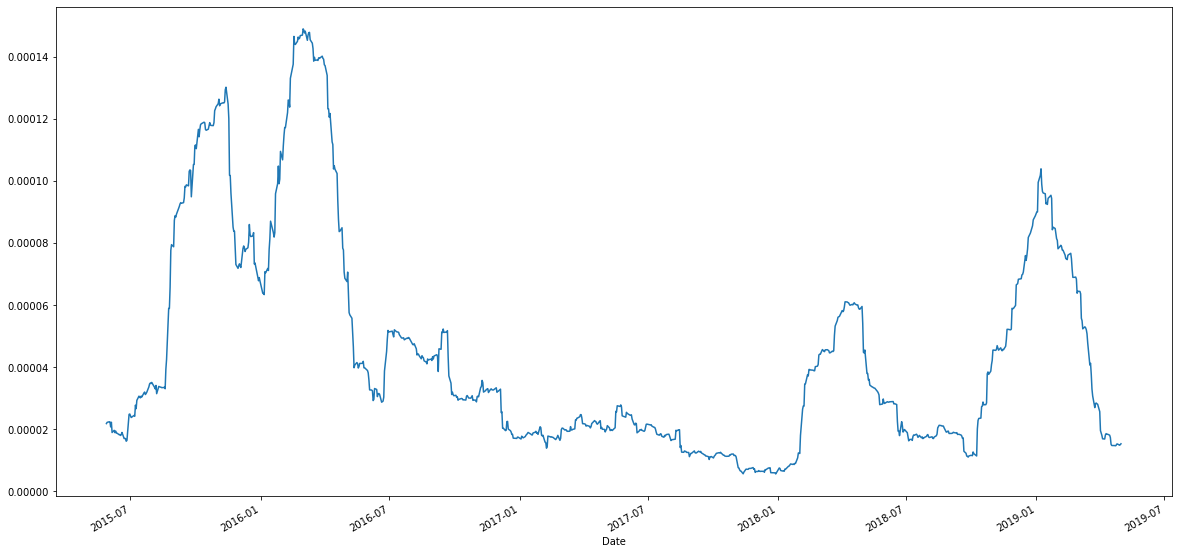

In [59]:
df_cov.plot(figsize=(20,10))

In [60]:
rolling_var_TSX = df_daily['TSX'].rolling(window = 60).var()

<AxesSubplot:xlabel='Date'>

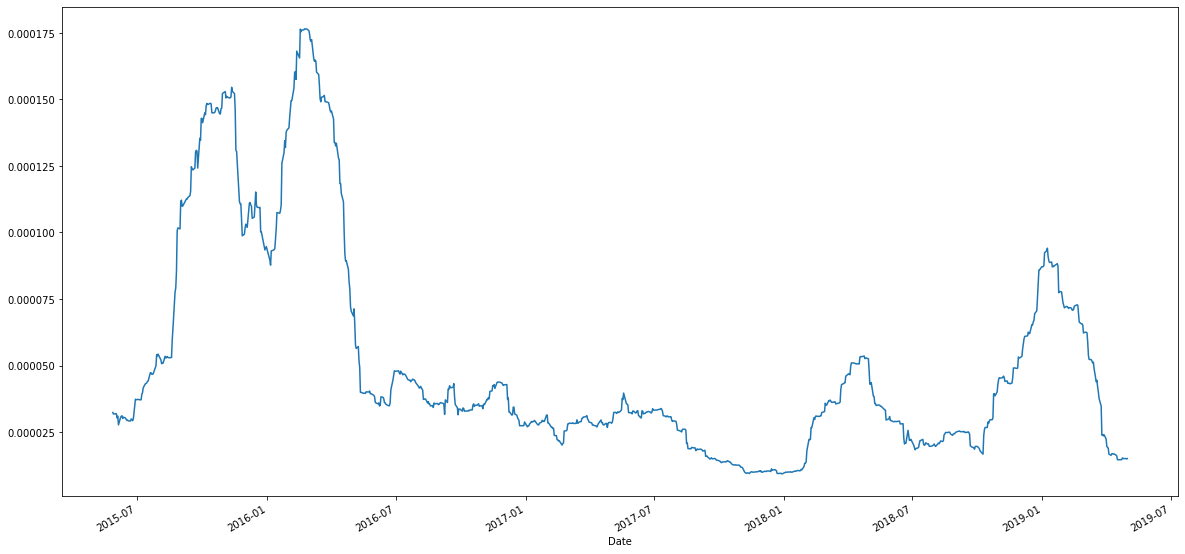

In [61]:
rolling_var_TSX.plot(figsize =(20,10))

In [62]:
rolling_beta = df_cov/rolling_var_TSX

<AxesSubplot:title={'center':'Rolling 60 Day Beta of Algo 2'}, xlabel='Date'>

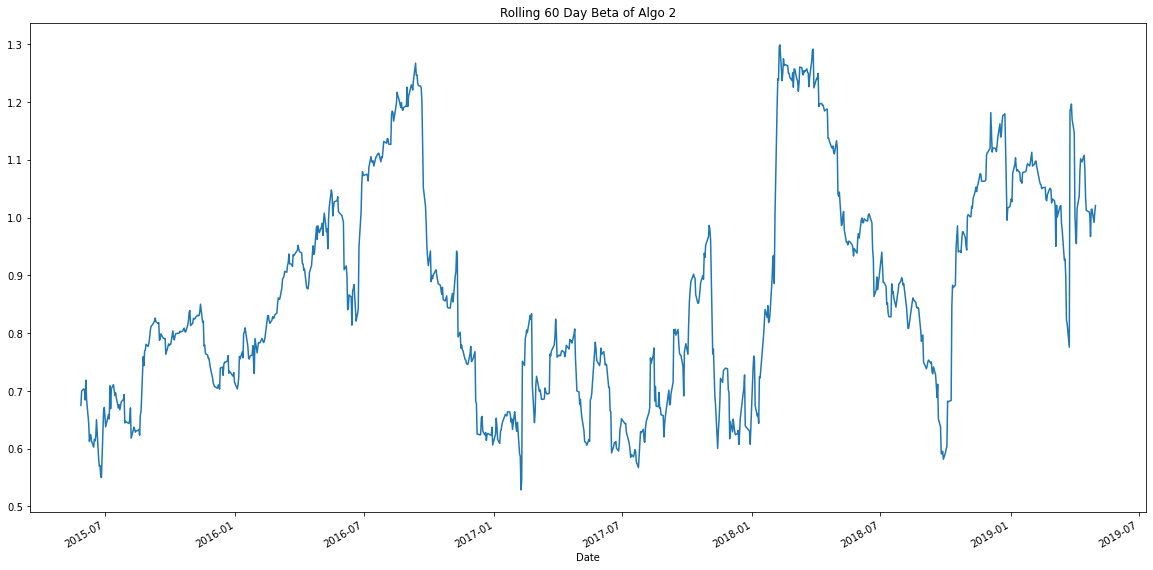

In [63]:
rolling_beta.plot(figsize =(20,10), title = 'Rolling 60 Day Beta of Algo 2')

<AxesSubplot:xlabel='Date'>

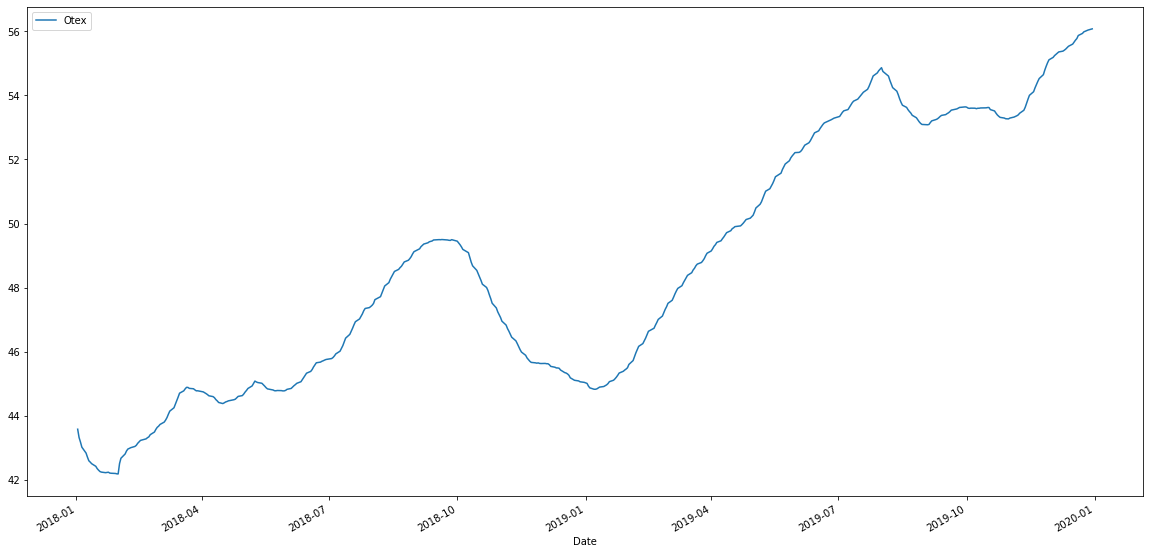

In [64]:
# rolling statistics challenge : Exponential Moving Average :
df_otex.ewm(halflife = 21).mean().plot(figsize = (20,10))

In [65]:
# Step 4 : Shapre Ratio:

In [66]:
rf_r = pd.read_csv('C:/Users/mehas/Downloads/risk_free_rate.csv', index_col = 'Date' , parse_dates = True , infer_datetime_format = True)

In [67]:
rf_rate = rf_r.loc['2018-01-03' : '2019-12-30']
rf_rate = rf_rate.sort_index()

In [68]:
rf_rate.dropna(inplace = True)

In [69]:
rf_returns = rf_rate.pct_change()
rf_returns.head()

,rf_rate
Date,
2018-01-03,NaN
2018-01-04,0.000000
2018-01-05,-0.014388
2018-01-08,0.043796
2018-01-09,-0.006993


In [70]:
rf_returns.dropna(inplace = True)

In [71]:
df_daily_rf = pd.concat([df_daily,rf_returns],axis = 'columns', join = 'inner')
df_daily_rf.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BRK,Algo 1,Algo 2,TSX,rf_rate
Date,,,,,,,,
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.000000
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.014388
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.043796
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.006993
2018-01-10,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.004368,-0.014085


In [72]:
s_r_portfolios = (df_daily_rf.mean() - df_daily_rf['rf_rate'].mean()) / (df_daily_rf.std()*np.sqrt(252))
s_r_portfolios.sort_values()

TSX                           -0.014958
PAULSON & CO.INC.             -0.014514
TIGER GLOBAL MANAGEMENT LLC   -0.012272
Algo 2                        -0.010747
SOROS FUND MANAGEMENT LLC     -0.010459
BRK                           -0.005641
Algo 1                        -0.005131
rf_rate                        0.000000
dtype: float64

<AxesSubplot:>

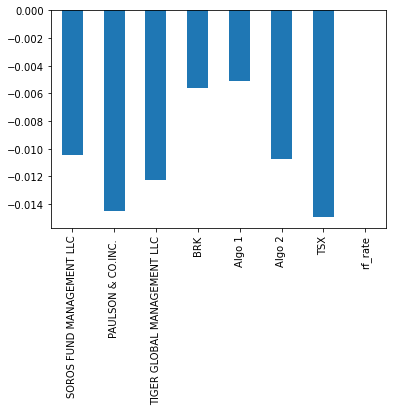

In [73]:
s_r_portfolios.plot(kind = 'bar')

Acoording to the sharpe ratio algo 1 has the best risk adjusted returns of all potfolios.

In [75]:
# Part 2 :
## Creating a custom portfolio

In [76]:
import numpy as np
import pandas as pd
from pathlib import Path

In [77]:
path1 = Path('C:/Users/mehas/Downloads/TECK.csv ')
path2 = Path('C:/Users/mehas/Downloads/WCN.csv ')
path3 = Path('C:/Users/mehas/Downloads/DSGX.csv ')

In [78]:
df_teck = pd.read_csv(path1,index_col = 'Date',parse_dates =True , infer_datetime_format = True)
df_wcn = pd.read_csv(path2,index_col = 'Date',parse_dates =True , infer_datetime_format = True)
df_dsgx = pd.read_csv(path3,index_col = 'Date',parse_dates =True , infer_datetime_format = True)

In [79]:
returns_teck =df_teck.pct_change()
returns_teck.rename(columns ={'Close' : 'TECK'},inplace = True)
returns_wcn =df_wcn.pct_change()
returns_wcn.rename(columns ={'Close' : 'WCN'},inplace = True)
returns_dsgx =df_dsgx.pct_change()
returns_dsgx.rename(columns ={'Close' : 'DSGX'},inplace = True)

In [80]:
df_portfolio = pd.concat([returns_teck,returns_wcn,returns_dsgx], axis = 'columns',join = 'inner')

In [81]:
df_portfolio.head()

,TECK,WCN,DSGX
Date,,,
2015-03-03,NaN,NaN,NaN
2015-03-04,-0.025172,-0.011991,0.004664
2015-03-05,0.025822,0.000000,-0.023873
2015-03-06,0.002288,-0.008304,0.027853
2015-03-09,-0.070320,0.016103,0.037013


In [82]:
df_portfolio.dropna(inplace = True)

In [83]:
df_portfolio.head()

,TECK,WCN,DSGX
Date,,,
2015-03-04,-0.025172,-0.011991,0.004664
2015-03-05,0.025822,0.000000,-0.023873
2015-03-06,0.002288,-0.008304,0.027853
2015-03-09,-0.070320,0.016103,0.037013
2015-03-10,-0.017682,0.000634,-0.032505


In [84]:
## equall weighted returns :
weights = [0.33,0.33,0.33]
portfolio_returns = df_portfolio.dot(weights)

In [85]:
portfolio_returns.head()

Date
2015-03-04   -0.010725
2015-03-05    0.000643
2015-03-06    0.007206
2015-03-09   -0.005677
2015-03-10   -0.016352
dtype: float64

In [86]:
df_returns = pd.concat([df_daily_rf,portfolio_returns],axis ='columns',join ='inner')
df_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BRK,Algo 1,Algo 2,TSX,rf_rate,0
Date,,,,,,,,,
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.000000,0.006753
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.014388,-0.002400
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.043796,0.016125
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.006993,0.000927
2018-01-10,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.004368,-0.014085,-0.001641


In [87]:
df_returns =df_returns.rename(columns = {0 : 'Portfolio'})

In [88]:
df_returns.sort_index(inplace= True)
df_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BRK,Algo 1,Algo 2,TSX,rf_rate,Portfolio
Date,,,,,,,,,
2018-01-04,-0.000914,0.004196,0.010743,0.004065,-0.000914,0.004294,0.002528,0.000000,0.006753
2018-01-05,0.004072,0.000823,0.000737,0.022023,-0.003839,0.006405,-0.003869,-0.014388,-0.002400
2018-01-08,0.004473,-0.003739,0.005085,0.003435,0.001653,0.000658,-0.001944,0.043796,0.016125
2018-01-09,-0.001028,0.000872,0.001789,0.000708,-0.001004,-0.002091,0.000097,-0.006993,0.000927
2018-01-10,-0.002753,-0.002290,-0.005720,-0.004781,0.003567,-0.000224,-0.004368,-0.014085,-0.001641


In [89]:
# cumulative = (1+df_returns).cumprod()

In [90]:
# cumulative.plot()

In [91]:
annualized_std = (df_returns['Portfolio'].std())*np.sqrt(252)
annualized_std

0.1979336606599897

<AxesSubplot:xlabel='Date'>

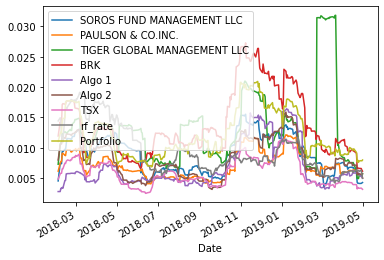

In [92]:
df_returns.rolling(window = 21).std().plot()

<AxesSubplot:xlabel='Date'>

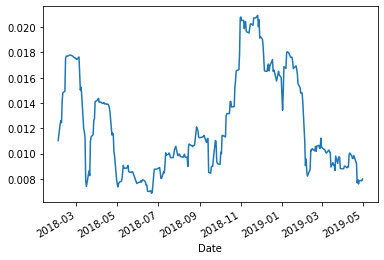

In [93]:
df_returns['Portfolio'].rolling(window =21).std().plot()

In [94]:
combined_corr = df_returns.corr()
combined_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BRK,Algo 1,Algo 2,TSX,rf_rate,Portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.769088,0.537478,0.781820,0.304291,0.833925,0.691346,-0.023278,0.581194
PAULSON & CO.INC.,0.769088,1.000000,0.536128,0.651088,0.325669,0.800702,0.622715,-0.048794,0.517974
TIGER GLOBAL MANAGEMENT LLC,0.537478,0.536128,1.000000,0.389225,0.143079,0.492835,0.438642,-0.055684,0.306996
BRK,0.781820,0.651088,0.389225,1.000000,0.294037,0.784268,0.648613,-0.027246,0.661641
Algo 1,0.304291,0.325669,0.143079,0.294037,1.000000,0.325293,0.281961,-0.084467,0.219688
Algo 2,0.833925,0.800702,0.492835,0.784268,0.325293,1.000000,0.758181,-0.073111,0.632730
TSX,0.691346,0.622715,0.438642,0.648613,0.281961,0.758181,1.000000,-0.012855,0.687812
rf_rate,-0.023278,-0.048794,-0.055684,-0.027246,-0.084467,-0.073111,-0.012855,1.000000,-0.002187
Portfolio,0.581194,0.517974,0.306996,0.661641,0.219688,0.632730,0.687812,-0.002187,1.000000


<AxesSubplot:>

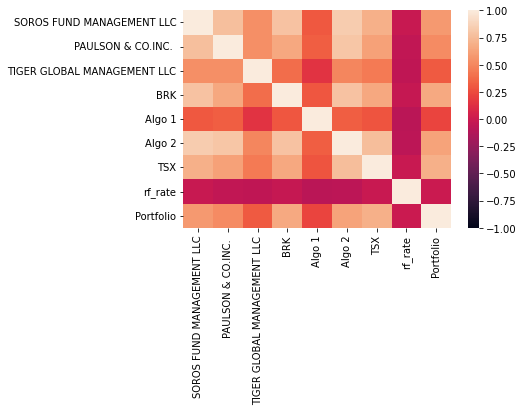

In [95]:
import seaborn as sns
sns.heatmap(combined_corr ,vmin =-1,vmax =1)

In [96]:
portfolio_cov = df_returns['Portfolio'].cov(df_returns['TSX'])
portfolio_cov

5.3595412927265254e-05

In [97]:
roll_cov_portfolio = df_returns['Portfolio'].rolling(window =60).cov(df_returns['TSX'])

In [98]:
roll_beta_portfolio =roll_cov_portfolio/rolling_var_TSX

<AxesSubplot:xlabel='Date'>

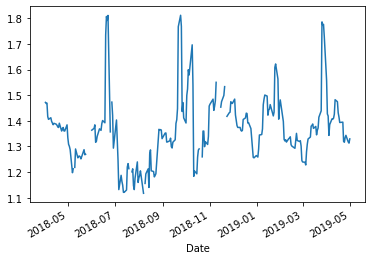

In [99]:
roll_beta_portfolio.plot()

In [104]:
s_r_allport = (df_returns.mean()-df_returns['rf_rate'].mean())/(df_returns.std()*np.sqrt(252))
s_r_allport.sort_values()

TSX                           -0.015613
PAULSON & CO.INC.             -0.014691
TIGER GLOBAL MANAGEMENT LLC   -0.012219
Algo 2                        -0.010599
SOROS FUND MANAGEMENT LLC     -0.010105
BRK                           -0.005683
Algo 1                        -0.005430
Portfolio                     -0.004548
rf_rate                        0.000000
dtype: float64

<AxesSubplot:>

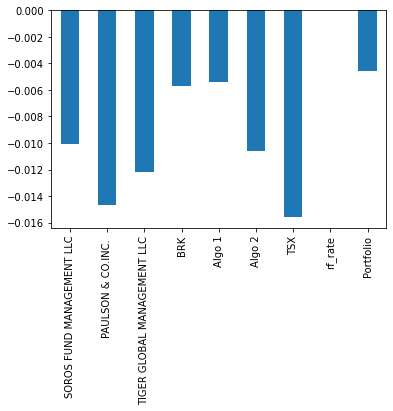

In [101]:
s_r_allport.plot(kind = 'bar')

ALthough the portfolio was based on past data, which is why i was able to select sectors that performed well during the period of this study.
As canadian market is weighted heavily with base metals and energy related securities, i avoided those at the period was not so kind to such securities.